# Contextualização

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>


# Setup

In [2]:
%%capture
%pip install kmodes

In [3]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [4]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

Apps de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Agrupa apenas pontos próximos entre si

Por quê não utilizar dummies no algoritmo? Vide:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## Simulated Data

In [5]:
# Simulando clusters
x,y = datasets.make_blobs(n_samples= int(5000), n_features=2, centers= 4, cluster_std=.8)
df =pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

A         B
0   6.506388 -1.691153
1  -9.176801 -0.670734
2  -8.614289 -0.714394
3 -10.312380 -1.271042
4 -10.901028 -2.334283

Text(0.5, 1.0, 'Labeled Clusters')

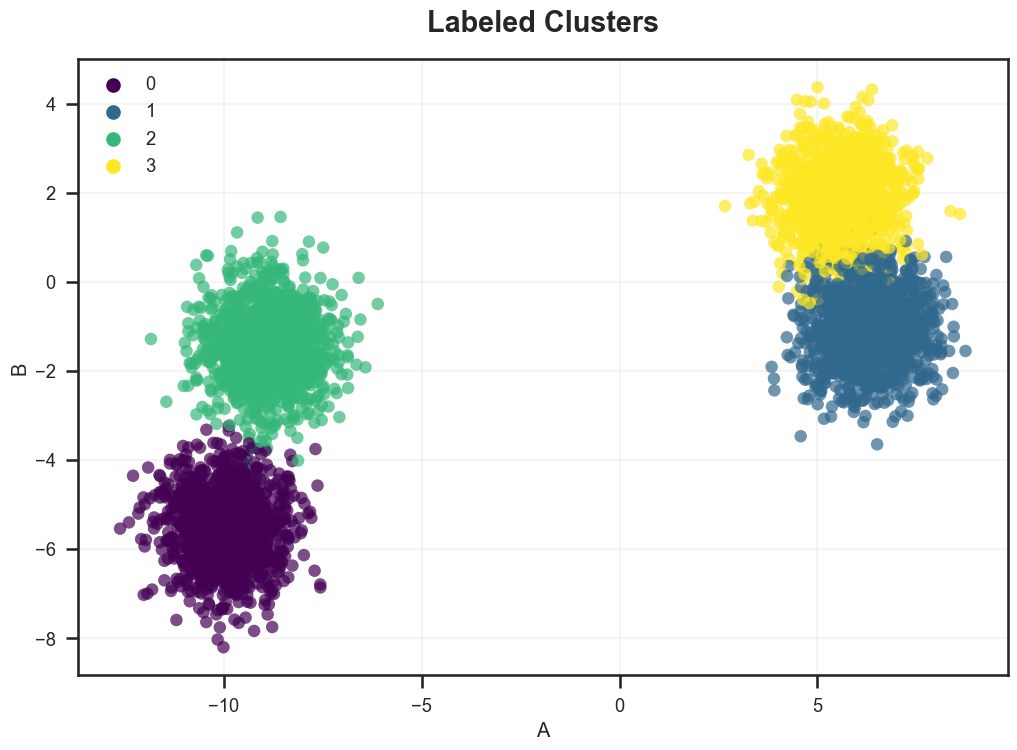

In [6]:
# Visualizar os clusters
scatter_kwargs = dict(palette='viridis', alpha=0.7, linewidth=0)
sns.scatterplot(data=df,x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled Clusters')

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

:

In [ ]:
# Usando a função
# k_means?
centroides, labels, intertia = k_means(x, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Labeled Clusters')

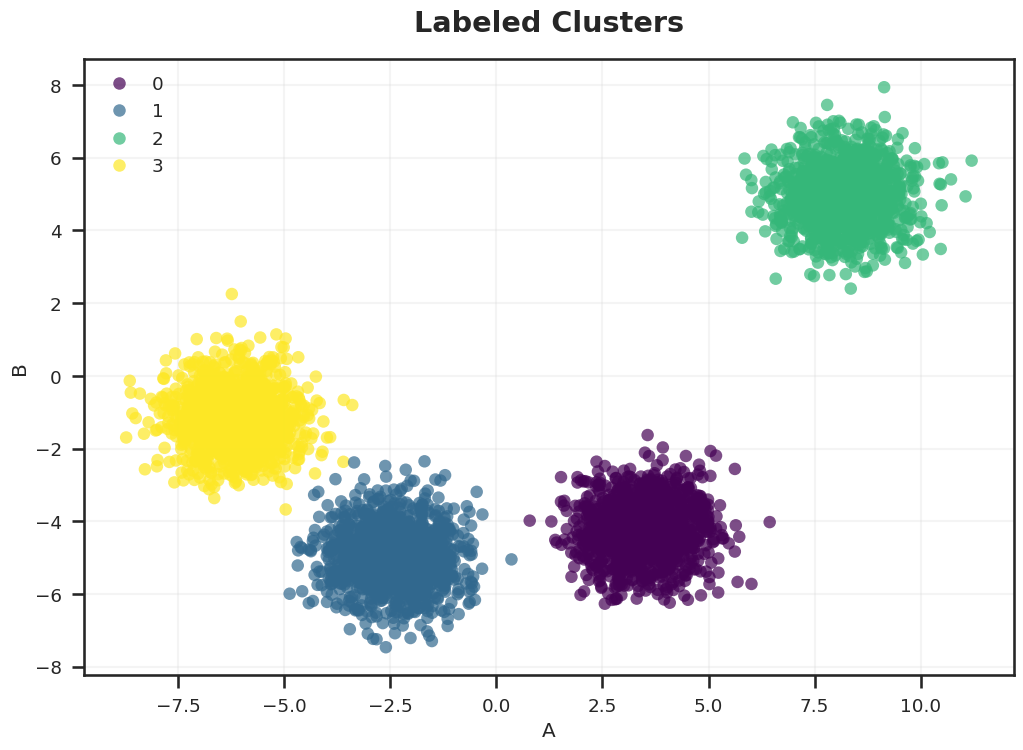

In [ ]:
scatter_kwargs = dict(palette='viridis', alpha=0.7, linewidth=0)
sns.scatterplot(data=df,x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled Clusters')

# Como esses dados já estam bem próximos o modelo ja certou diretamente,
# isso lógico também porque estamos no controle do que está acontecendo e sabemos a quantidade de K


In [7]:
# Usando a Classe Kmeans
model = KMeans(n_clusters= 4)
model.fit(x)

KMeans(n_clusters=4)

In [8]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

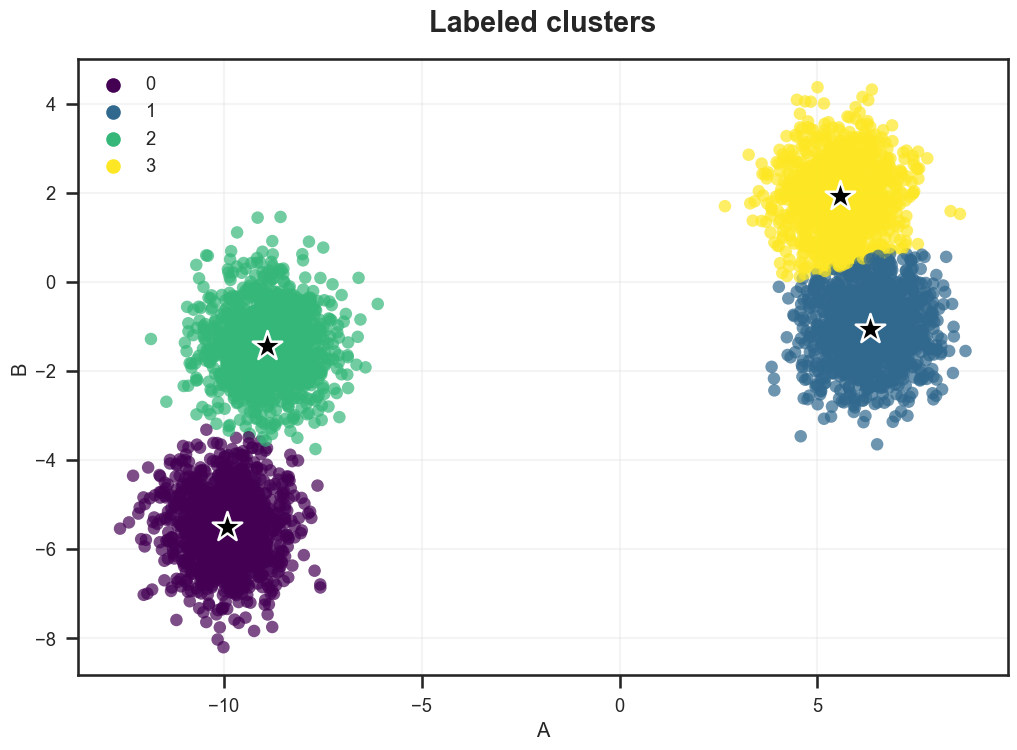

In [9]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

## Model evaluation

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- WCSS
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

In [10]:
# Sklearn Metrics
print('silhouette_score: ',silhouette_score(x,labels))
print('davies_bouldin_score: ',davies_bouldin_score(x,labels))
print('calinski_harabasz_score: ',calinski_harabasz_score(x,labels))

# Um Valores bons de metricas

silhouette_score:  0.611222031778634
davies_bouldin_score:  0.5561596350788027
calinski_harabasz_score:  88804.03856053948


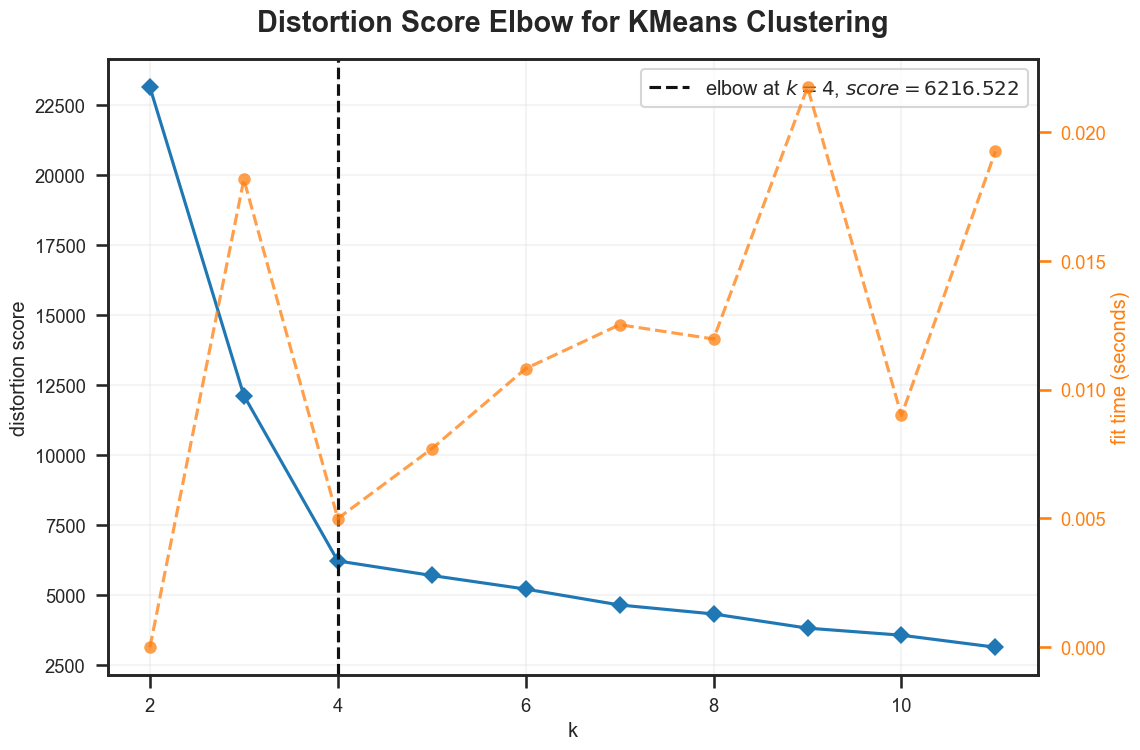

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11), k=11)

In [11]:
# Kelbow_visualizer
# podemos passar um valor inteiro ou uma tupla

# kelbow_visualizer(model=KMeans(), X= x, k=(3,11))
kelbow_visualizer(model=KMeans(), X= x, k=11)

# Temos a partir do 4 o modelo para de diminuir e acaba ficando na mesma situação
# O modelo ele está nos dando um sugestão de deixar no 4, mas nem sempre está muito claro

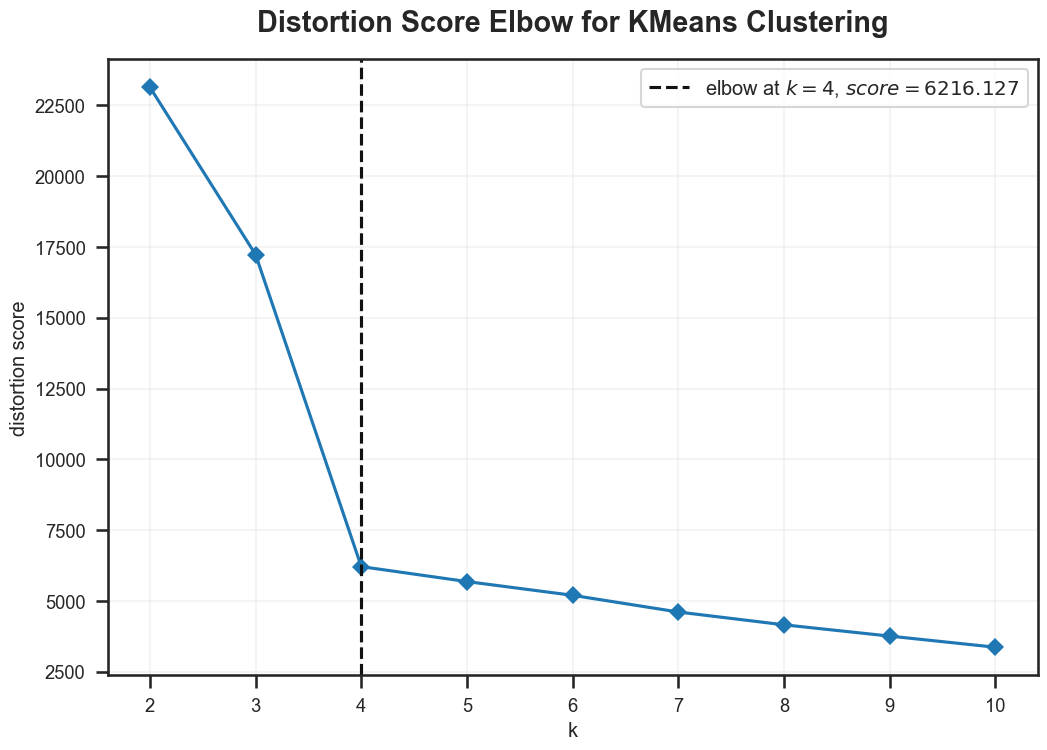

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [12]:
kelbow_visualizer(model=KMeans(), X= x, k=10, timings= False, metrics='silhouette')


Testando distintos agrupamentos:

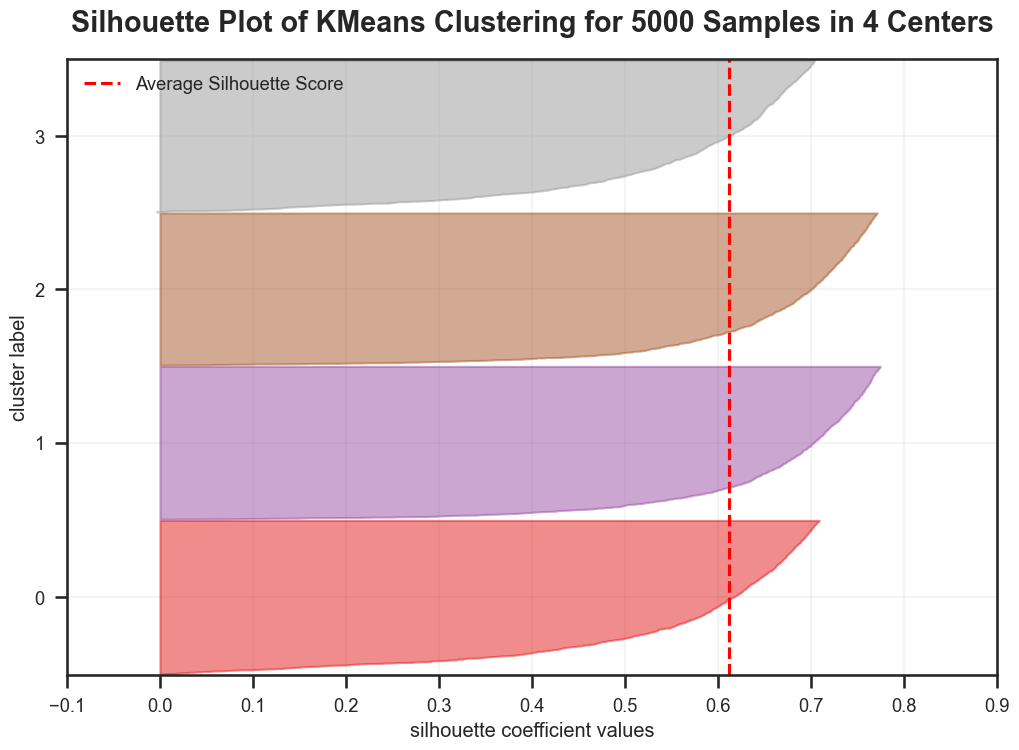

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [13]:
# Grafico de silhouette
silhouette_visualizer(KMeans(n_clusters=4),X=x)

Testando distintos agrupamentos:

In [ ]:
# Criando uma lista de dicionarios para todas as metricas

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(x)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(x, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[{'k': 2,
  'inertia': 75557.01826750672,
  'silhouette_score': 0.666467539743466,
  'davies_bouldin_score': 0.3923486930363474,
  'calinski_harabasz_score': 10463.070427420971},
 {'k': 3,
  'inertia': 23994.881520178787,
  'silhouette_score': 0.6908996393371679,
  'davies_bouldin_score': 0.4078958177048271,
  'calinski_harabasz_score': 21839.19121078924},
 {'k': 4,
  'inertia': 6321.633025700942,
  'silhouette_score': 0.7697813524523249,
  'davies_bouldin_score': 0.31946212538110613,
  'calinski_harabasz_score': 59907.623740392206},
 {'k': 5,
  'inertia': 5777.995401664548,
  'silhouette_score': 0.6554460281358514,
  'davies_bouldin_score': 0.6716359961809799,
  'calinski_harabasz_score': 49267.341520206784},
 {'k': 6,
  'inertia': 5231.517744121358,
  'silhouette_score': 0.5205875544715516,
  'davies_bouldin_score': 0.9318364539954743,
  'calinski_harabasz_score': 43630.48916397436},
 {'k': 7,
  'inertia': 4744.465857800609,
  'silhouette_score': 0.4171262801496399,
  'davies_bouldin

In [ ]:
# Criando o DataFrame
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

# Olhando todos esses parametros o K 4 tem uma boa metrica para todos
# silhouette_score e calinski_harabasz_score quanto maior melhor
# davies_bouldin_score quanto menor mehor

In [ ]:
# Style DataFrame
(

pd.DataFrame(cluster_metrics_results)
.set_index('k')
.style.background_gradient(cmap='Oranges', subset='inertia')
.highlight_max(subset=['silhouette_score', 'calinski_harabasz_score'])
.highlight_min(subset=['davies_bouldin_score'])
)


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
# X_random with numpy
x_random = np.random.rand(*x.shape)
x_random

array([[0.38692426, 0.01644098],
       [0.5755563 , 0.20494787],
       [0.03323636, 0.476595  ],
       ...,
       [0.32774765, 0.34510192],
       [0.69061119, 0.10436988],
       [0.86442902, 0.7196474 ]])

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(x_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(x_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Criando um dataframe
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

Comparando de forma interativa:

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

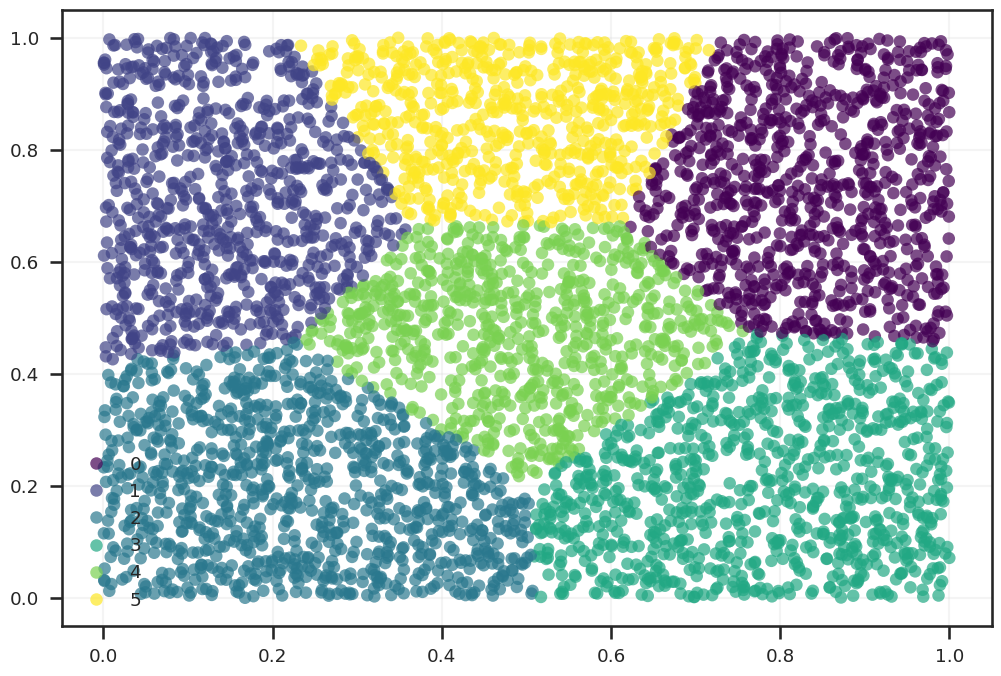

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = x if data=='x' else x_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

## High dimensional data

In [ ]:
# Simulando clusters com altos valores dimensionais
x_dim,y_dim = datasets.make_blobs(n_samples= int(1000), n_features=10, centers= 4, cluster_std=.8, random_state=0)
df_dim =pd.DataFrame(x_dim, columns=list(string.ascii_uppercase[:x_dim.shape[1]]))
df_dim.head()

A         B         C         D          E         F         G  \
0   1.375988  3.328840  2.252246  0.163276  -2.048389  1.498086 -1.626945   
1  -4.778629  5.591210 -0.834382  0.333095 -10.125881  3.179277  2.914841   
2  11.184614  5.196295 -0.802285  5.042595  -7.432989  3.606461 -7.730530   
3   9.696156  5.280882 -1.214031  4.589872  -8.312332  3.070013 -6.423507   
4  -4.262755  4.842532 -0.878987  1.944770  -8.669946  2.534408  2.236930   

          H         I         J  
0  7.672603  9.713141 -2.330450  
1  1.443623  9.603470  5.607201  
2  8.711666  1.110940 -1.709037  
3  9.210979  1.207334 -1.770543  
4  0.444544  8.682765  3.178775

In [ ]:
# Aplicando PCA - uma tecnica que tentar diminuir a dimensionalidade
pca = PCA()
pca_components = pca.fit_transform(df_dim)
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -5.856883  3.122523  6.136654 -0.686487  0.347968 -0.618029 -0.467717   
1 -11.436590 -6.559320 -4.410817 -1.239685 -0.029943  1.017996  0.895097   
2   6.443283  9.334398 -3.091811 -1.298623 -0.771382  0.358402  0.372171   
3   5.114664  8.403564 -3.589742 -1.178399 -0.325189 -0.178110 -0.224107   
4 -10.328252 -5.222973 -3.462066  0.586746 -0.655750  1.066886 -0.717080   

        PC8       PC9      PC10  
0 -0.505754 -0.563464  0.814840  
1 -0.878642 -0.584850 -0.537870  
2 -0.301598 -1.050753  0.198899  
3 -0.534450  0.190508  0.744221  
4  0.606951 -1.759044  0.041215

In [ ]:
# Verificando a variancia
pd.DataFrame(
{'explained_var':pca.explained_variance_ratio_,
 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()}
)

# Esses valores mostram o quanto cada coluna explica e é importante para o nosso problema,
# Com isso podemos tomar a decisão de remover ou não uma certa coluna do dataset
# COm isso vemos que as 3 primeiras colunas nos mostram e explicam 96% do problema

explained_var  explained_var_cumsum
0       0.553295              0.553295
1       0.307542              0.860836
2       0.108453              0.969289
3       0.004899              0.974188
4       0.004765              0.978953
5       0.004509              0.983462
6       0.004389              0.987851
7       0.004282              0.992133
8       0.004086              0.996219
9       0.003781              1.000000

<Axes: xlabel='PC1', ylabel='PC2'>

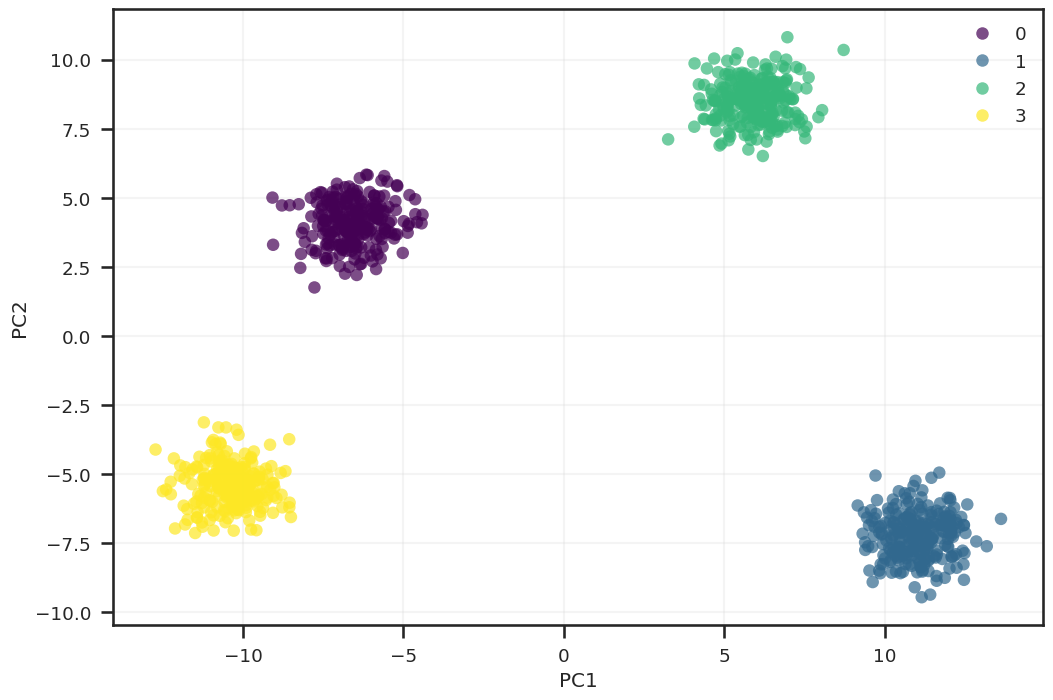

In [ ]:
# PLotando PCA com True Label

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs)

# Plotando apenas com 2 variáveis temos uma explicação muito boa

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

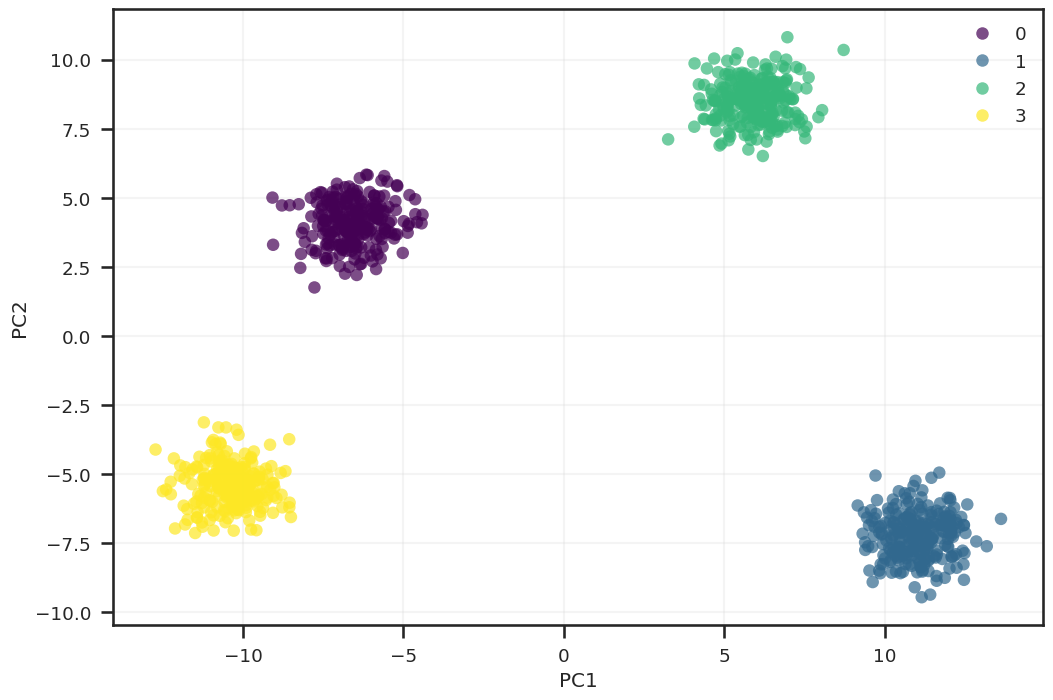

In [ ]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs)

In [ ]:
#3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

# Hierarchical clustering

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Dendograma fica com visualização inviável para muitas amostras


In [ ]:
# Simulando clusters
x,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

A         B
0 -1.710205  8.159010
1 -0.397014  2.109227
2 -1.148252  8.216479
3  2.334665 -0.024083
4 -1.347961  3.713714

In [ ]:
# Clusterização hierarquica com sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(x)

<Axes: xlabel='A', ylabel='B'>

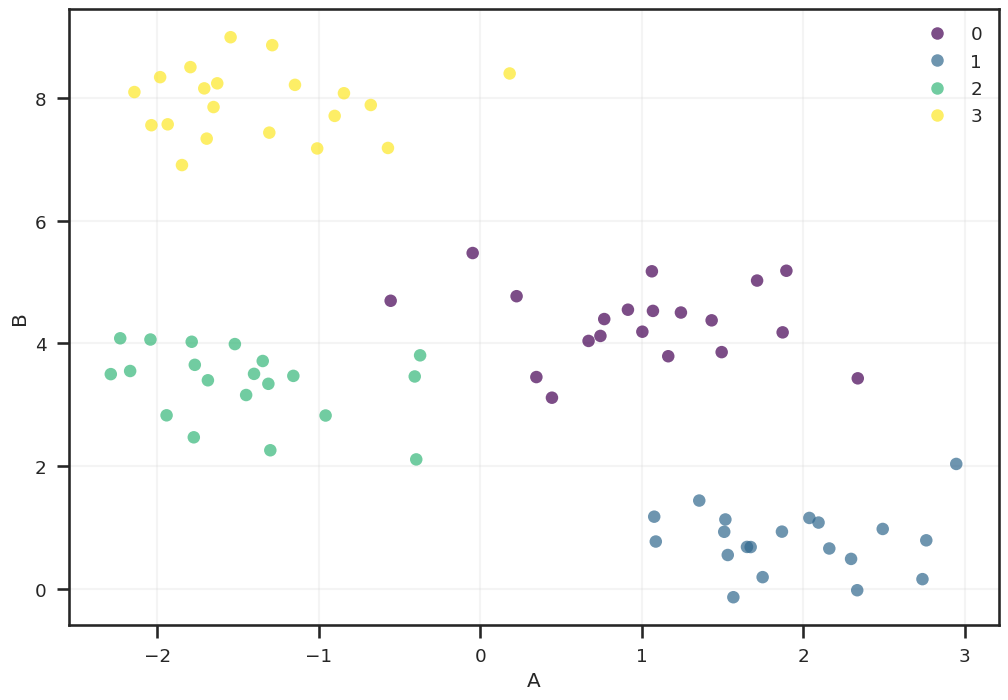

In [ ]:
# Dados originais
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)

<Axes: xlabel='A', ylabel='B'>

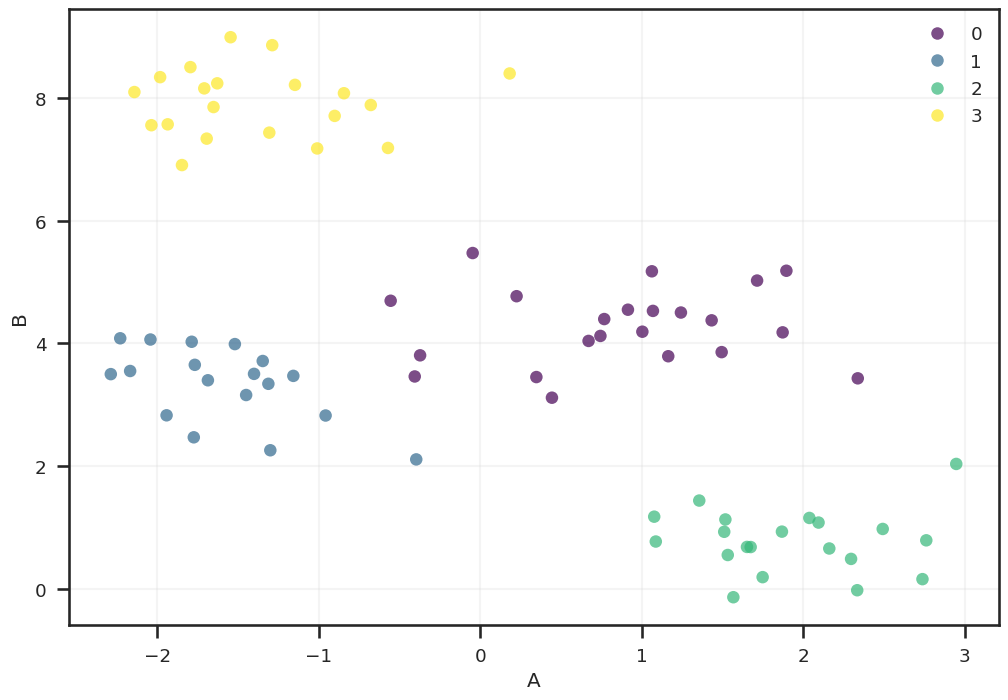

In [ ]:
# Dados com a clusterização hierarquica
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)

In [ ]:
# Clusterização com Scipy
z = linkage(df, method='ward')

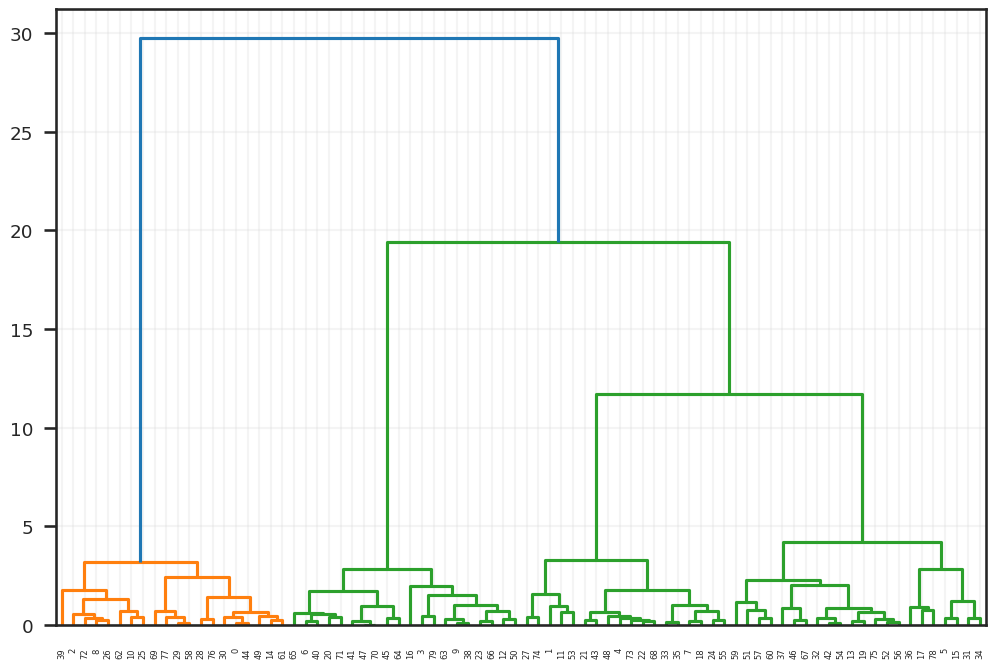

In [ ]:
dendrogram_dict  = dendrogram(z)
plt.show()

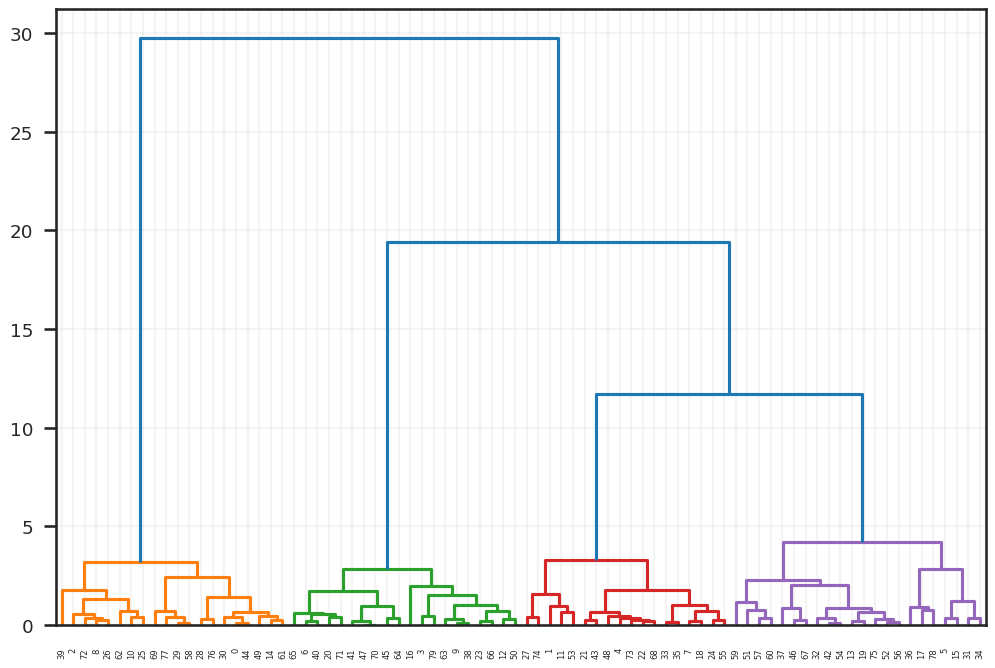

In [ ]:
# Podemos pedir para termos um corte em um ponto específico
dendrogram_dict  = dendrogram(z, color_threshold=10)
plt.show()

In [ ]:
# 4 cluster no maximo
fcluster(z,4,criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [ ]:
# variando o método
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

# DBSCAN

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [ ]:
# Simulate clusters
x,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

A         B
0  1.998996  1.535900
1 -2.788784  2.773154
2 -0.956255  3.630438
3  2.777738 -1.508286
4  0.982364  5.013279

In [ ]:
# Vizualizando
model = DBSCAN()
labels = model.fit_predict(x)

In [ ]:
# Usando a função do DBSCAN
core_samples, labels = dbscan(x)

<Axes: xlabel='A', ylabel='B'>

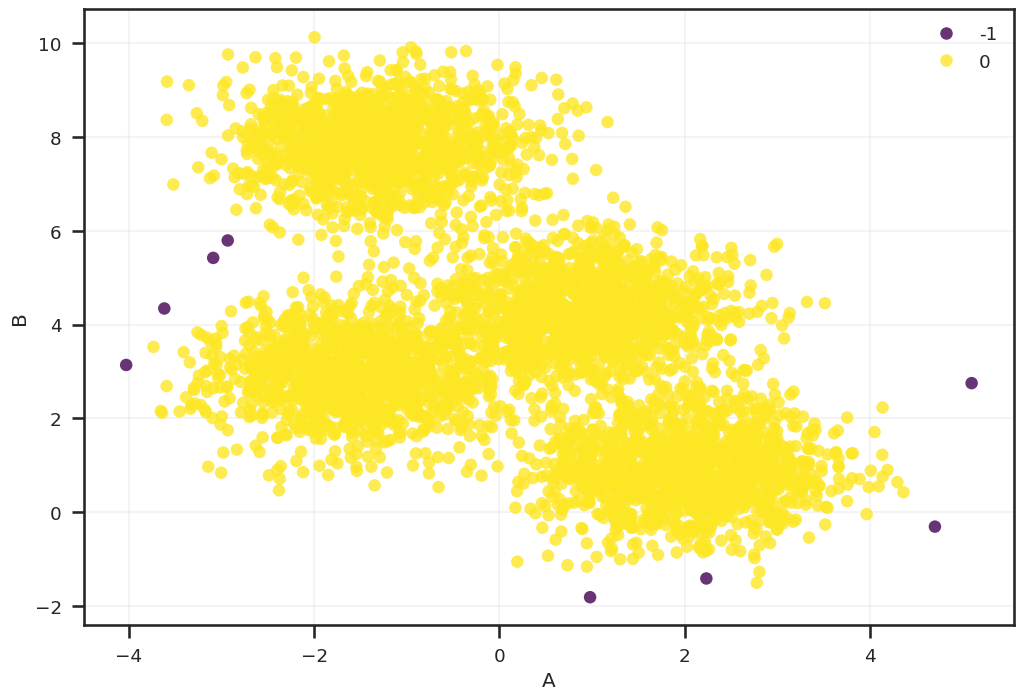

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)

In [ ]:
# _ para quando não queremos guardar o valor
@interact(eps=(0.01, 1, 0.01), min_samples=(1,20) )
def custom_df_scan(eps, min_samples):
  _, labels = dbscan(x, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  plt.show()


interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

# MeanShift

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- Não é possível especificar número de clusters

In [ ]:
# Simulate clusters
x,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

A         B
0 -2.256086  7.858356
1  0.568548  3.953328
2 -2.602152  8.418937
3 -2.625338  2.063689
4  2.286564  1.227960

<Axes: xlabel='A', ylabel='B'>

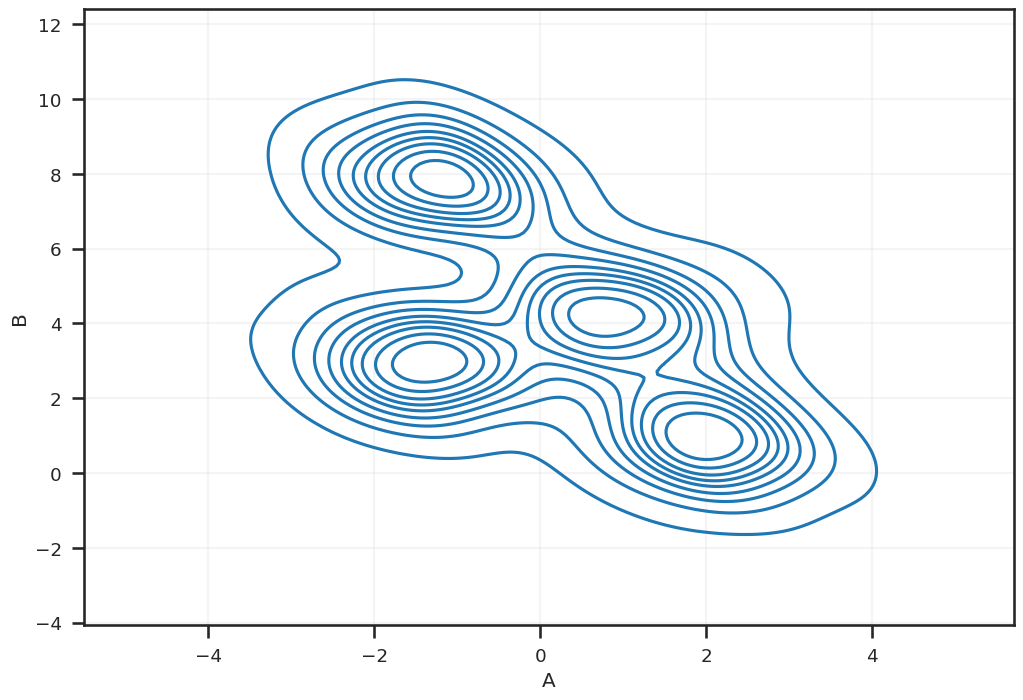

In [ ]:
# Plot de densidade
sns.kdeplot(data=df, x='A', y='B')
# Aqui podemos ver que temos 4 nucles principais

In [ ]:
# Estimating bandwidth
estimate_bandwidth(x)
# vai ser passado esse valor por padrão caso nada seja passado

2.822735629625506

In [ ]:
# model e Label
model = MeanShift()
labels = model.fit_predict(x)

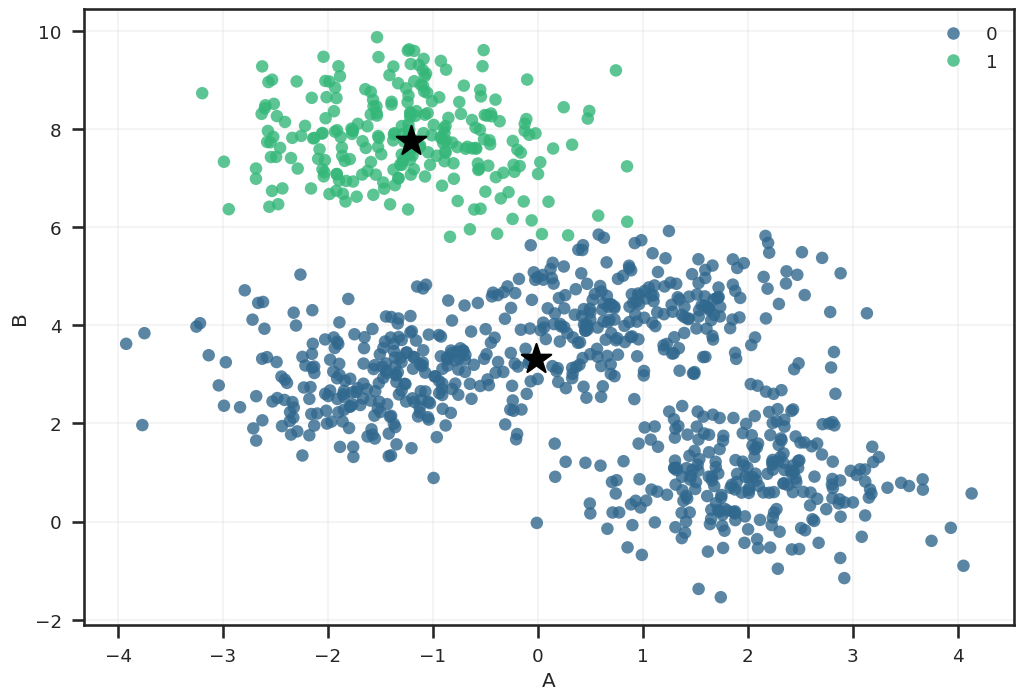

In [ ]:
# Plotando
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()
# No caso ele apenas identificou apenas 2 grandes grupos

In [ ]:
# Cluster all faz com que os outliers sejam considerados ou não
@interact(bandwidth=(0.1, 3,0.01))
def func_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(x)
  ax =sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

# Gaussian Mixture

In [ ]:
# Simulate clusters
x,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

A         B
0 -2.256086  7.858356
1  0.568548  3.953328
2 -2.602152  8.418937
3 -2.625338  2.063689
4  2.286564  1.227960

In [ ]:
# Criando o modelo
model = GaussianMixture(n_components=4)
model.fit(x)

GaussianMixture(n_components=4)

In [ ]:
# Atrubutos de model
model.means_
model.covariances_[0]
model.weights_

array([0.2521594 , 0.25101906, 0.24902054, 0.247801  ])

In [ ]:
# BIC
model.bic(x)

# Esse é o valor que usamos para comparar o nosso modelo com outros

7475.928561883233

In [ ]:
# Labels preditas
model.predict(x)[:5]

array([1, 2, 1, 3, 0])

In [ ]:
# Probabilidade predita
model.predict_proba(x)[:5]

# é a probabilidade de pertencer a cada tipo de cluster, como foi atribuido 4 temos quatro valores probabilisticos

array([[4.47036452e-22, 9.99999993e-01, 5.43870188e-09, 1.06690606e-09],
       [2.57137974e-04, 9.63882315e-07, 9.81041706e-01, 1.87001920e-02],
       [2.49568344e-25, 1.00000000e+00, 4.11129219e-11, 9.41302197e-12],
       [8.71070480e-09, 8.40546996e-12, 1.92312544e-05, 9.99980760e-01],
       [9.99927378e-01, 2.93030421e-19, 7.16656227e-05, 9.56574332e-07]])

<Axes: xlabel='A', ylabel='B'>

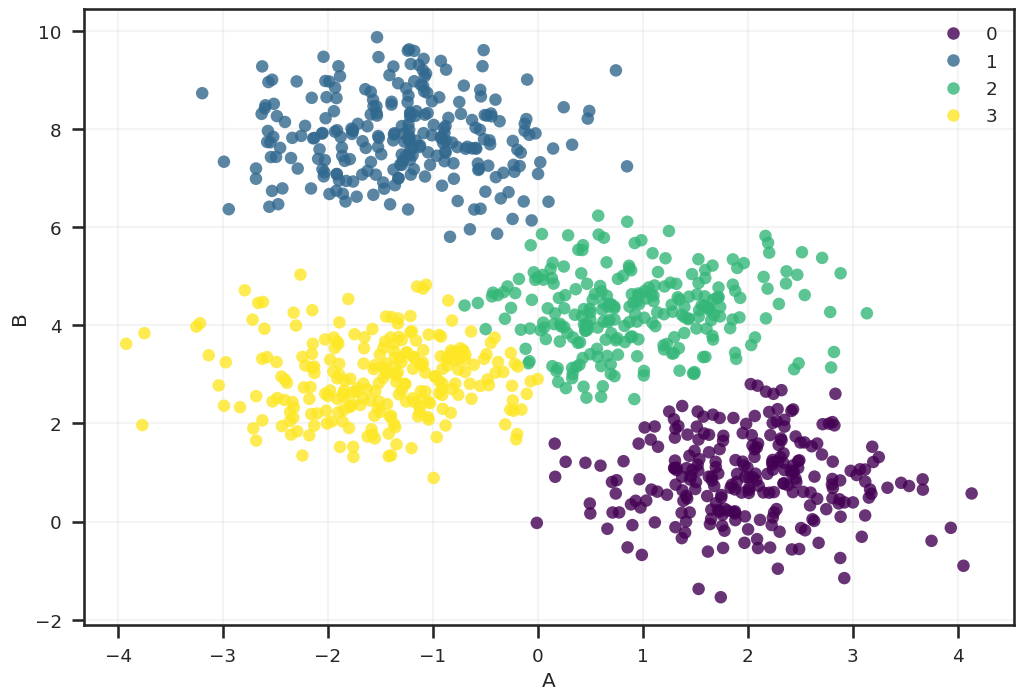

In [ ]:
# Plot
labels = model.predict(x)
sns.scatterplot(data=df, x='A', y='B', hue=labels,**scatter_kwargs )

# Tivemos aparentemente um agrupamento muito bom e bem padrão
# Como no Kmeans precisamos fazer um gráfico de cotovelo para definir a quantidade de clusters

In [ ]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(x)
    results.append({
      'bic': mclust.bic(x),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

bic  n_components covariance_type
0   8357.218909             1            full
1   8357.218909             1            tied
2   8679.299153             1            diag
3   8889.310673             1       spherical
4   7976.527656             2            full
5   8165.511057             2            tied
6   8050.082533             2            diag
7   8036.917677             2       spherical
8   7526.427331             3            full
9   7736.187733             3            tied
10  7656.896132             3            diag
11  7666.905826             3       spherical
12  7475.928562             4            full
13  7419.260030             4            tied
14  7450.139988             4            diag
15  7426.425803             4       spherical
16  7512.290195             5            full
17  7441.626257             5            tied
18  7484.365548             5            diag
19  7453.796055             5       spherical
20  7548.301475             6            full
21  7460.362990             6            tied
22  7510.595169             6            diag
23  7476.707963             6       spherical
24  7583.531335             7            full
25  7482.343931             7            tied
26  7545.765275             7            diag
27  7508.979555             7       spherical
28  7616.949262             8            full
29  7497.852025             8            tied
30  7569.825325             8            diag
31  7533.072563             8       spherical

In [ ]:
results.sort_values('bic').head()

bic  n_components covariance_type
13  7419.260030             4            tied
15  7426.425803             4       spherical
17  7441.626257             5            tied
14  7450.139988             4            diag
19  7453.796055             5       spherical

<Axes: xlabel='n_components', ylabel='bic'>

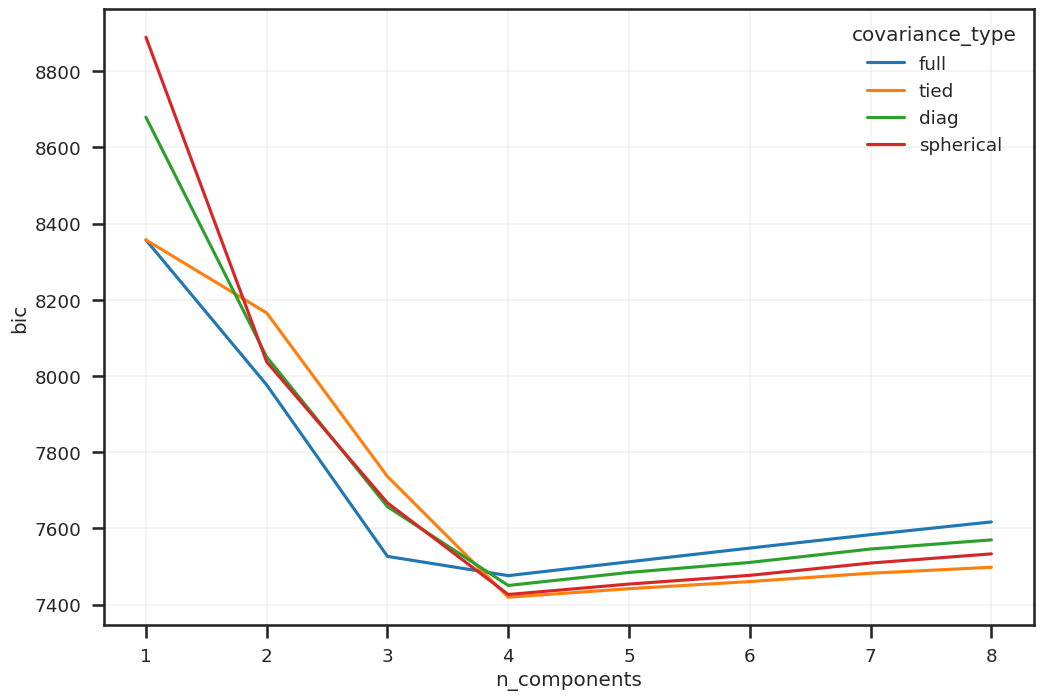

In [ ]:
# plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type')

# Vendo que no geral todos estão bem próximos, vemos que alguns padrões estão performando melhor que o padrão que é o FULL

# Dataset with mix data

**Clustering com dados categóricos:**
- kmodes (apenas dados categóricos)
- kprototypes (dados numéricos e categóricos)
- hierarquical clustering com Glower' distance

**Análises de associação / redução de dimensionalidade:**
- Análise de correspondência simples (CA) - apenas dados categóricos com 2 variáveis
- Análise de correspondência múltipla (MCA) - apenas dados categóricos com 2 ou mais variáveis
- FAMD - dados mistos

## Dados categóricos

In [ ]:
from yellowbrick.datasets import load_mushroom

In [ ]:
# Carregando o dataset
df = load_mushroom()[0]
df.head()

shape surface   color
0  convex  smooth  yellow
1    bell  smooth   white
2  convex   scaly   white
3  convex  smooth    gray
4  convex   scaly  yellow

In [ ]:
# clusterizando o dataset
model = KModes(n_clusters=4)
labels = model.fit_predict(df)
print(labels)
print(model.cost_)

# Novamente, esse valor de metrica não quer dizer nada sozinho, o ideal é sempre comparar

[0 1 0 ... 1 0 0]
8851.0


In [ ]:
# Avaliando o modelo

custos = [KModes(n_clusters = k).fit(df).cost_ for k in range(2,11)]
custos

[11560.0, 10343.0, 8851.0, 8111.0, 7203.0, 6708.0, 6416.0, 6190.0, 5882.0]

<Axes: >

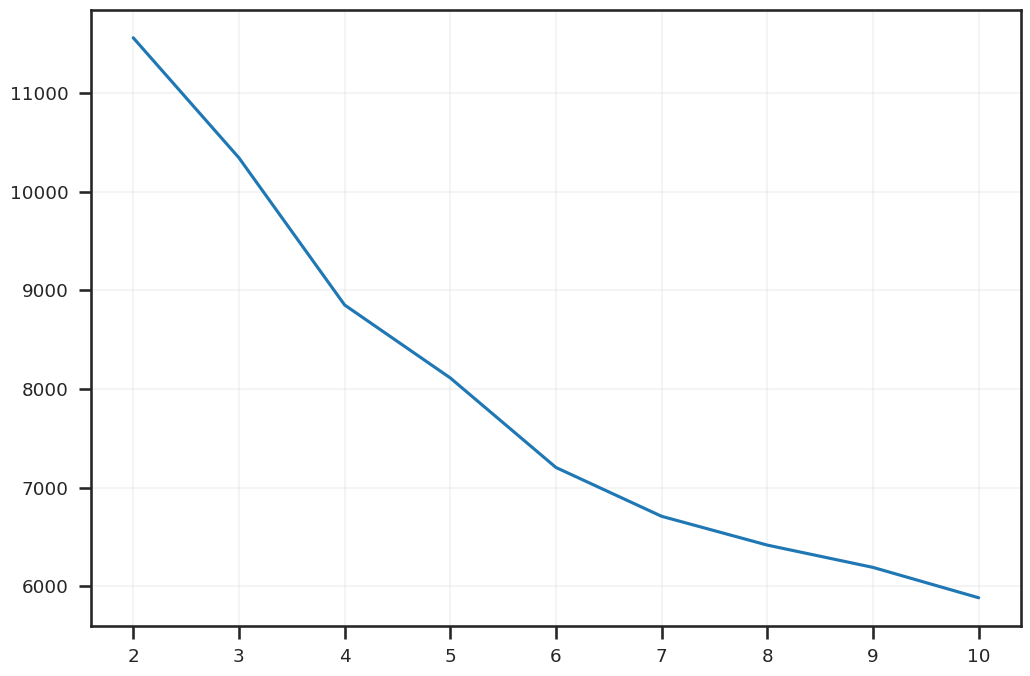

In [ ]:
pd.Series(custos, index=range(2,11)).plot()

# Com isso é visto que a metrica do 7 ja temos que os seguintes avanços não mudam muito e seria uma bom numero de clusters

## Dados mistos

Fonte e dicionário do dataset: [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [ ]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [ ]:
# Padronizando dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Colocando na mesma escala
df_diabetes[numerical_columns].apply(scale)

age  trestbps      chol   thalach   oldpeak
0    0.952197  0.763956 -0.256334  0.015443  1.087338
1   -1.915313 -0.092738  0.072199  1.633471  2.122573
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705
4    0.290464 -0.663867  2.082050  0.583939 -0.379244
..        ...       ...       ...       ...       ...
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373
300  1.503641  0.706843 -1.029353 -0.378132  2.036303
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862

[303 rows x 5 columns]

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


#precisamos pegar o index para as categoricas
categorical_index  = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical= categorical_index)

KPrototypes(gamma=10.234792076990077)

In [ ]:
labels  = model.predict(df_diabetes, categorical= categorical_index)

array([4, 4, 5, 4, 2, 5, 2, 4, 5, 5, 4, 0, 4, 1, 6, 5, 2, 1, 4, 4, 4, 4,
       5, 6, 5, 2, 5, 3, 7, 5, 5, 3, 5, 4, 1, 5, 2, 4, 6, 2, 2, 4, 1, 4,
       2, 2, 4, 4, 1, 4, 4, 2, 4, 3, 4, 5, 5, 4, 5, 2, 0, 2, 5, 1, 5, 5,
       1, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 5, 5, 4, 4, 2, 2, 2, 0, 7, 4, 5,
       5, 0, 4, 5, 5, 2, 3, 1, 7, 4, 2, 4, 4, 6, 5, 4, 5, 1, 6, 4, 4, 4,
       2, 3, 2, 5, 4, 5, 5, 5, 5, 4, 0, 4, 4, 4, 5, 5, 1, 6, 5, 0, 5, 4,
       2, 4, 2, 4, 3, 1, 1, 0, 2, 2, 5, 1, 1, 6, 4, 4, 4, 3, 6, 3, 6, 6,
       5, 1, 4, 5, 1, 5, 4, 2, 5, 5, 5, 0, 1, 4, 4, 5, 4, 4, 2, 5, 1, 3,
       4, 2, 3, 0, 2, 1, 2, 4, 6, 2, 4, 0, 4, 3, 2, 1, 3, 6, 5, 2, 4, 4,
       0, 4, 5, 4, 0, 6, 3, 4, 4, 6, 3, 5, 4, 4, 1, 2, 4, 2, 0, 2, 0, 4,
       7, 1, 2, 6, 1, 3, 0, 1, 6, 2, 4, 6, 6, 0, 2, 2, 2, 2, 2, 2, 0, 6,
       1, 0, 3, 4, 7, 6, 6, 6, 0, 4, 0, 0, 6, 2, 0, 1, 6, 4, 6, 4, 0, 4,
       1, 1, 2, 3, 0, 0, 4, 4, 0, 4, 0, 5, 1, 4, 2, 3, 2, 5, 1, 5, 1, 2,
       5, 4, 2, 1, 5, 2, 6, 1, 3, 3, 1, 3, 1, 0, 1,

In [ ]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_index).cost_
    for K in range(2,11)
    ]
custos

[613805.5933734317,
 480252.5398522215,
 400212.2162164675,
 340317.4632110079,
 300628.3383575597,
 276704.19919149164,
 253038.05423484326,
 236455.887358705,
 220056.08686059457]

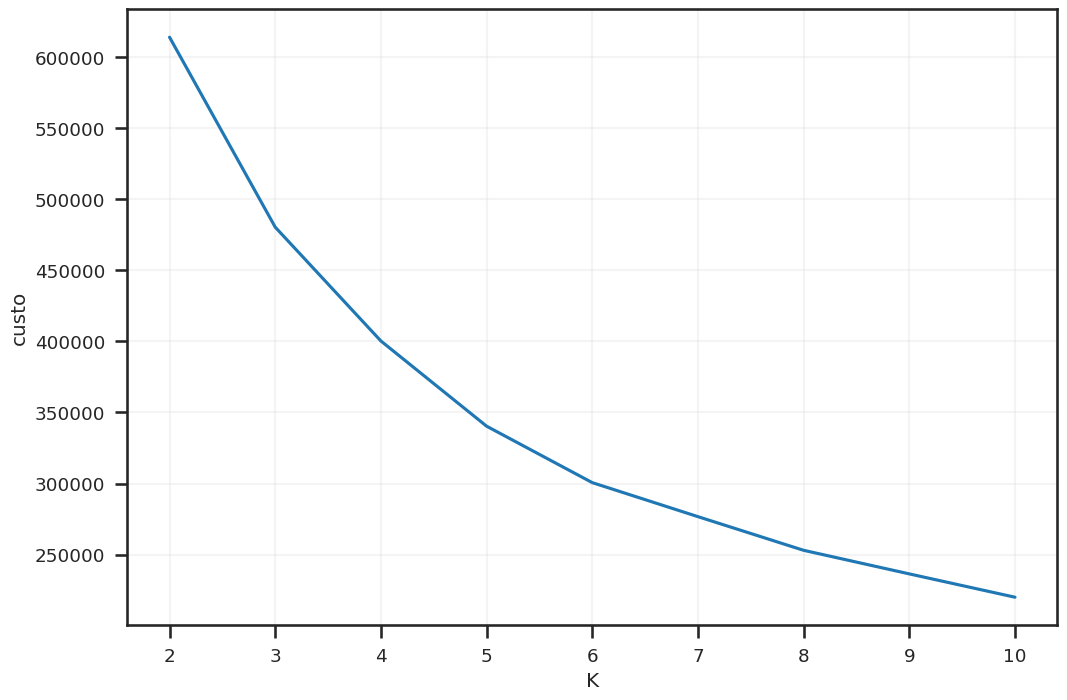

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

# Novemente, parece que 7 ou 8 são os melhores numeros de clusters a serem selecionados

# Wine dataset

## Carregando dados

In [2]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

## Data cleaning

In [3]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Há dados duplicados?

In [6]:
df_wines.duplicated().any()

False

Há dados faltantes?

In [7]:
df_wines.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Há outliers?

<Axes: >

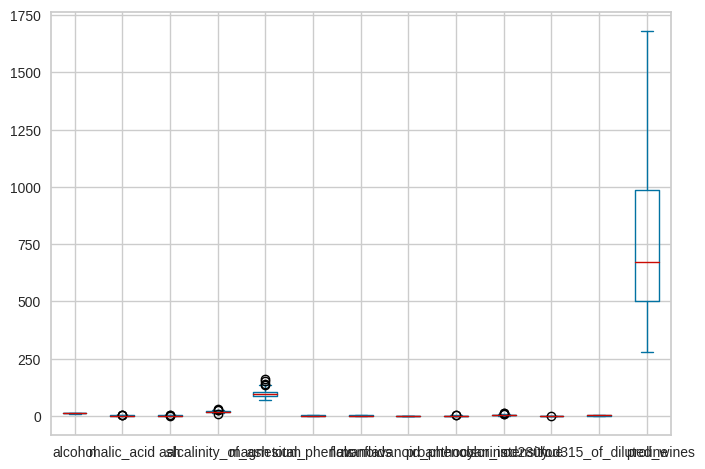

In [8]:
df_wines.plot.box()
# Parace que temos outliers, mas não estamos na mesma escala

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

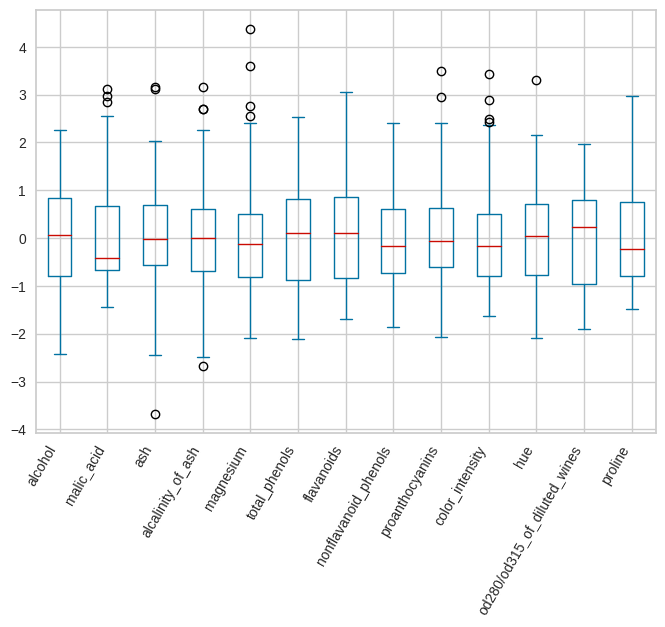

In [11]:
df_wines.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right')
# Confirmado que temos sim outliers, mas em apenas em algumas colunas

In [12]:
df_wines_scalled = df_wines.apply(scale)

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [15]:
# abs - valores absolutos
# Gt = >=
# Considerando a linha
outliers  = df_wines_scalled.abs().gt(3).any(axis=1)
outliers.sum()

# Somente 10 outliers maiores que 3 de desvio padrão

10

In [17]:
# ~ considera tudo aquilo que não é, ou seja, aqui estamos pegando tudo que não for outlier
df= df_wines_scalled[~outliers]

## Verificando melhor K

Utilizando o KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

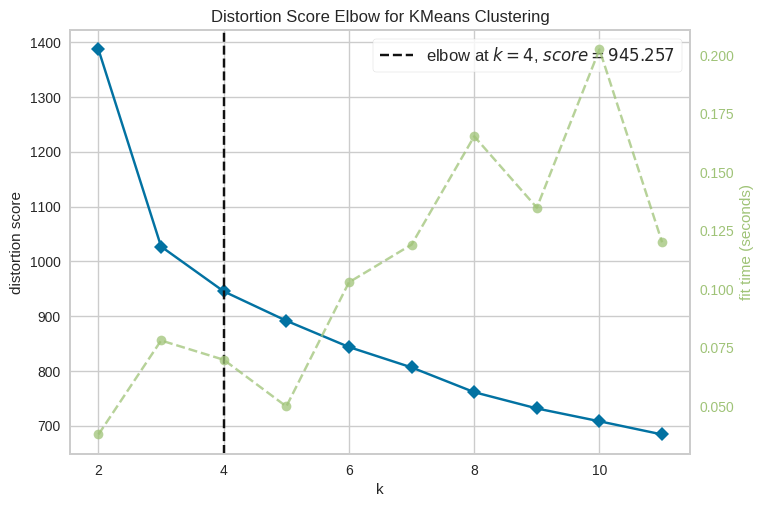

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11), k=11)

In [22]:
kelbow_visualizer(KMeans(), df,k=11)

# Está nos recomendando o 4 e parece realmente que é o melhor número de cluesters

Criando e treinando o modelo

In [23]:
model = KMeans(4, random_state=0).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
centroids = model.cluster_centers_
labels = model.labels_

## Interpretando clusters

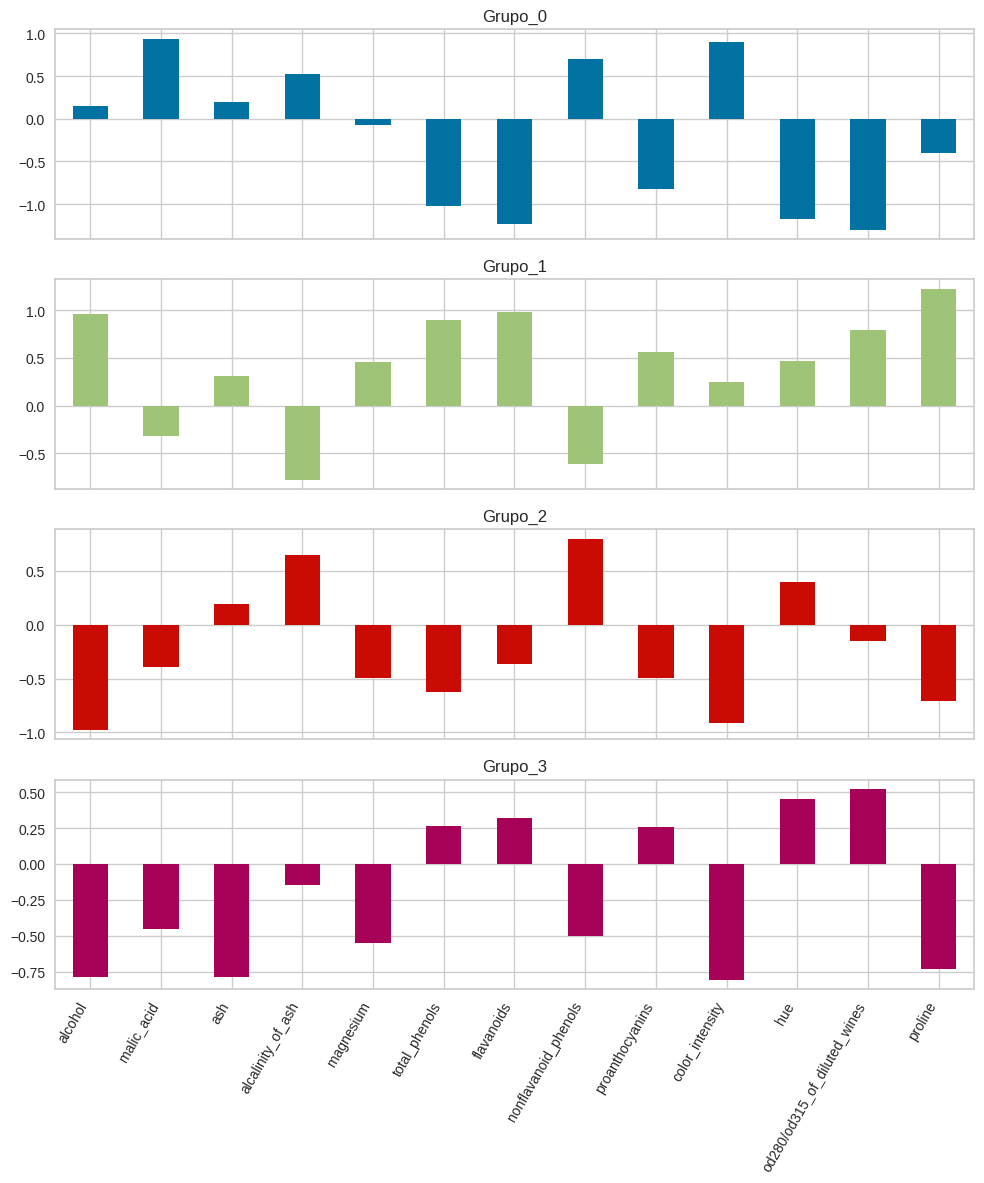

In [38]:
#  T de transpose para inverter as colunas e linhas
(
    pd.DataFrame(centroids, columns= df.columns)
    .T.add_prefix('Grupo_').plot.bar(subplots=True, figsize=(10,12), legend=False)

)

plt.xticks(rotation=60, ha='right')
# Tenta ajustar o plot para não ficar muito apertado
plt.tight_layout()
plt.show()

Para interpretar vemos aquilo que está positivo, se olhar o alcool como exemplo temos que o grupo 3 é o único que está positivo e sabemos assim quais sãos os produtos que tem mais teor alcólico

In [39]:
 centers = pd.DataFrame(centroids, columns= df.columns)

 centers

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.146964    0.937031  0.195499           0.528549  -0.076428   
1  0.960537   -0.316354  0.309729          -0.774933   0.455725   
2 -0.974152   -0.395284  0.191113           0.648933  -0.490200   
3 -0.786132   -0.453349 -0.790481          -0.143883  -0.549105   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -1.026817   -1.237424              0.700397        -0.816473   
1       0.897698    0.974760             -0.607763         0.563785   
2      -0.628614   -0.367120              0.797288        -0.495663   
3       0.265048    0.316454             -0.502648         0.255705   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.903750 -1.179659                     -1.296928 -0.398762  
1         0.241598  0.463243                      0.786065  1.220968  
2        -0.916222  0.401839                     -0.154359 -0.709675  
3        -0.806486  0.453388                      0.521338 -0.734021

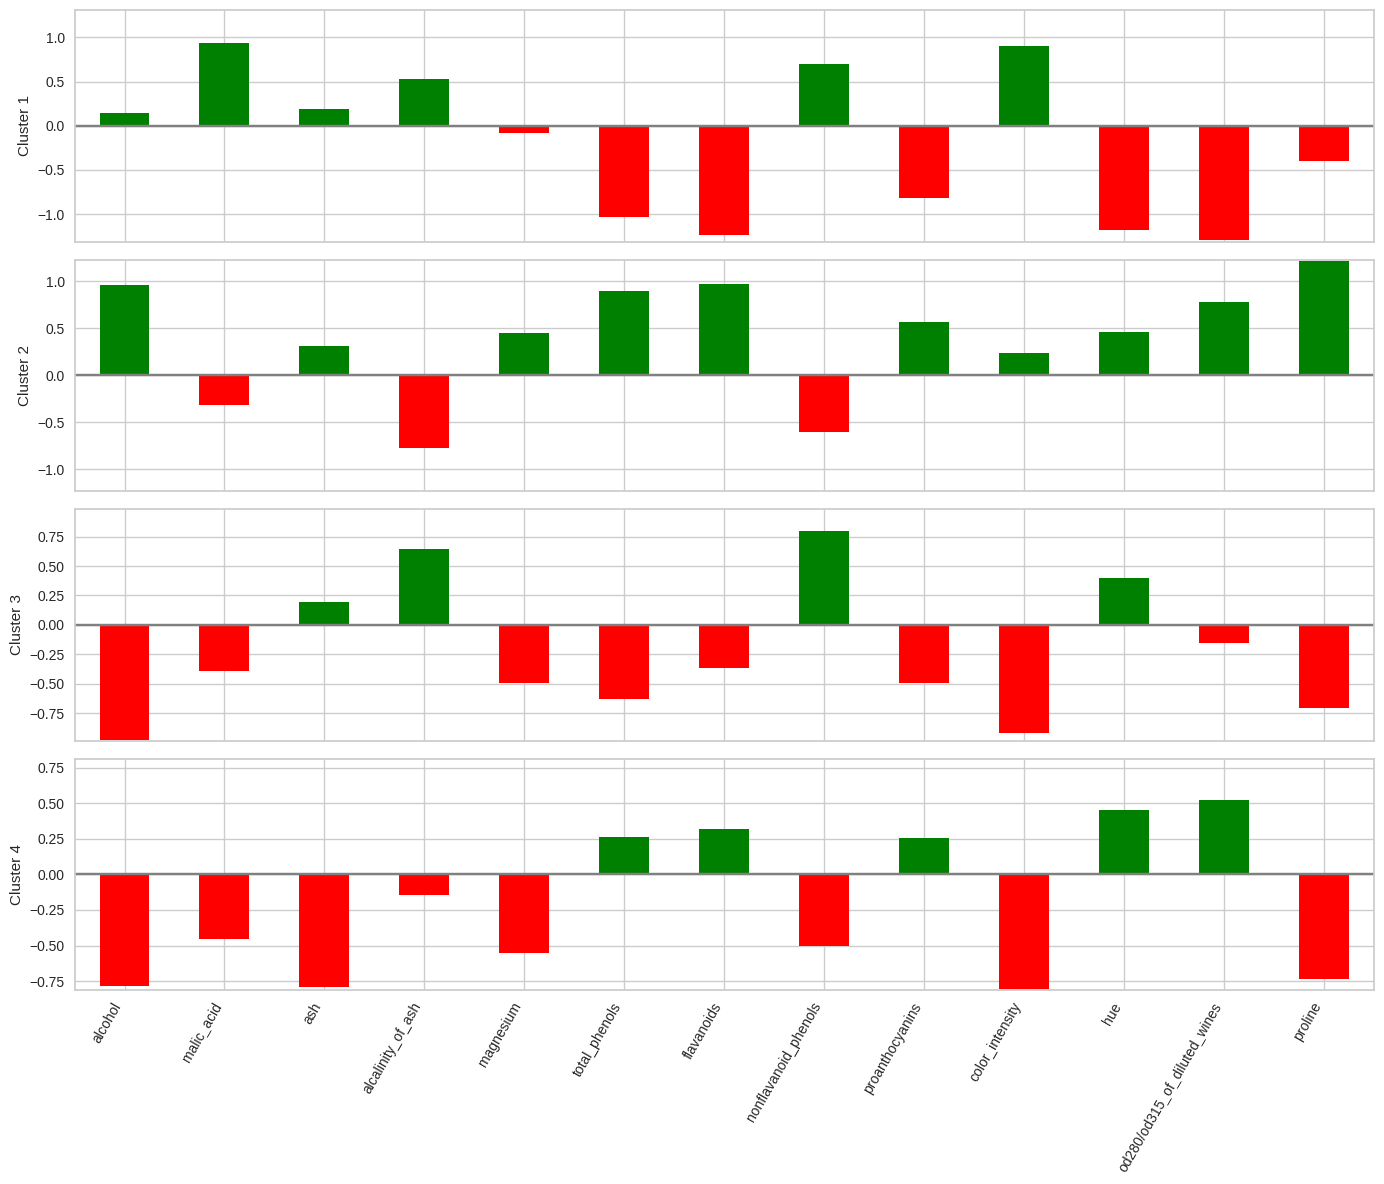

In [40]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Mostrando de forma mais claro onde está positivo e onde está negativo

Mostrando com o Dataset original - Tudo na escala original do Dataset

In [46]:
(
    df_wines[~outliers].assign(cluster=labels)
    .groupby('cluster')
    .agg(['mean', 'min', 'median', 'max'])

)

alcohol                       malic_acid                     \
              mean    min  median    max       mean   min median   max   
cluster                                                                  
0        13.119592  12.20  13.110  14.16   3.380204  1.24  3.300  5.65   
1        13.778214  12.85  13.765  14.83   1.983929  1.35  1.765  4.04   
2        12.212000  11.41  12.080  13.49   1.896000  0.74  1.630  4.43   
3        12.364211  11.45  12.335  13.86   1.831316  0.89  1.520  4.31   

              ash        ...    hue       od280/od315_of_diluted_wines        \
             mean   min  ... median   max                         mean   min   
cluster                  ...                                                   
0        2.420000  1.98  ...  0.670  0.96                     1.693469  1.27   
1        2.451250  2.04  ...  1.065  1.28                     3.168214  2.51   
2        2.418800  2.02  ...  0.980  1.45                     2.502400  1.59   
3        2.150263  1.70  ...  1.060  1.42                     2.980789  2.14   

                          proline                         
        median   max         mean    min  median     max  
cluster                                                   
0        1.680  2.47   621.673469  372.0   620.0   880.0  
1        3.170  4.00  1130.303571  735.0  1100.0  1680.0  
2        2.500  3.30   524.040000  315.0   495.0   870.0  
3        3.035  3.64   516.394737  278.0   479.0  1020.0  

[4 rows x 52 columns]

In [48]:
(
    df_wines[~outliers].assign(cluster=labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(cmap='YlOrRd', axis=1)
)

In [49]:
# Plotando a metrica de silhouette_score
silhouette_score(df_wines_scalled[~outliers], labels)

0.24989859662052233